# Лабораторная работа №1.5

In [ ]:
import numpy as np
import random
import mmh3 
import matplotlib.pyplot as plt

class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.counters = np.zeros((depth, width), dtype=np.int32)
        self.seeds = [random.randint(0, 2147483647) for _ in range(depth)]
        
    def update(self, item, count=1):
        for i in range(self.depth):
            hash_val = mmh3.hash(item, self.seeds[i]) % self.width
            self.counters[i, hash_val] += count
            
    def estimate(self, item):
        min_count = float('inf')
        for i in range(self.depth):
            hash_val = mmh3.hash(item, self.seeds[i]) % self.width
            if self.counters[i, hash_val] < min_count:
                min_count = self.counters[i, hash_val]
        return min_count

# Анализ

Test d = 2, w = 10
False - positive rate: 50.0
Test d = 2, w = 50
False - positive rate: 50.0
Test d = 2, w = 100
False - positive rate: 49.7
Test d = 2, w = 200
False - positive rate: 42.7
Test d = 2, w = 500
False - positive rate: 20.4
Test d = 2, w = 1000
False - positive rate: 6.4
Test d = 2, w = 2000
False - positive rate: 3.2
Test d = 3, w = 10
False - positive rate: 50.0
Test d = 3, w = 50
False - positive rate: 50.0
Test d = 3, w = 100
False - positive rate: 49.2
Test d = 3, w = 200
False - positive rate: 38.2
Test d = 3, w = 500
False - positive rate: 13.9
Test d = 3, w = 1000
False - positive rate: 2.6
Test d = 3, w = 2000
False - positive rate: 0.4
Test d = 5, w = 10
False - positive rate: 50.0
Test d = 5, w = 50
False - positive rate: 50.0
Test d = 5, w = 100
False - positive rate: 48.7
Test d = 5, w = 200
False - positive rate: 30.4
Test d = 5, w = 500
False - positive rate: 4.6
Test d = 5, w = 1000
False - positive rate: 0.5
Test d = 5, w = 2000
False - positive rate: 0.0

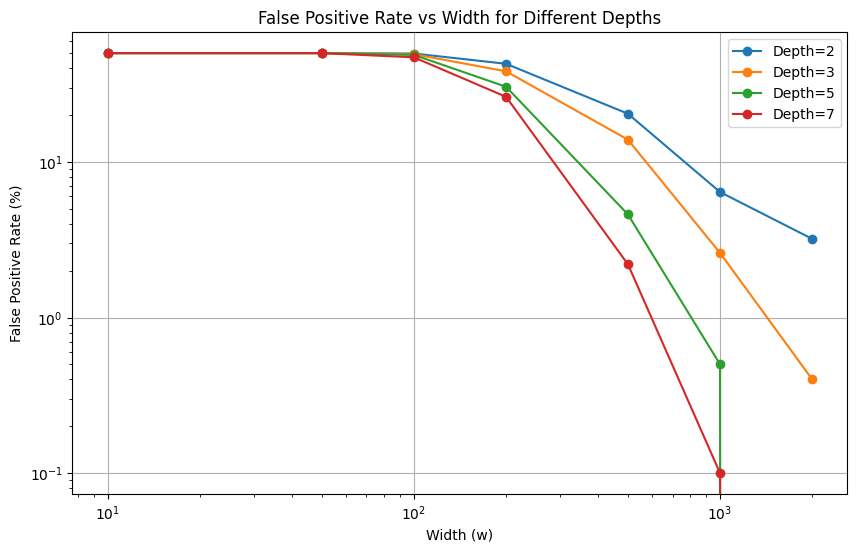

Test d = 1, w = 100
False - positive rate: 50.0
Test d = 2, w = 100
False - positive rate: 48.8
Test d = 3, w = 100
False - positive rate: 48.5
Test d = 4, w = 100
False - positive rate: 49.2
Test d = 5, w = 100
False - positive rate: 48.5
Test d = 6, w = 100
False - positive rate: 47.5
Test d = 7, w = 100
False - positive rate: 47.6
Test d = 8, w = 100
False - positive rate: 47.1
Test d = 9, w = 100
False - positive rate: 48.7
Test d = 10, w = 100
False - positive rate: 46.9
Test d = 1, w = 500
False - positive rate: 32.8
Test d = 2, w = 500
False - positive rate: 20.1
Test d = 3, w = 500
False - positive rate: 13.8
Test d = 4, w = 500
False - positive rate: 9.1
Test d = 5, w = 500
False - positive rate: 4.6
Test d = 6, w = 500
False - positive rate: 2.7
Test d = 7, w = 500
False - positive rate: 2.2
Test d = 8, w = 500
False - positive rate: 1.0
Test d = 9, w = 500
False - positive rate: 0.6
Test d = 10, w = 500
False - positive rate: 0.9
Test d = 1, w = 1000
False - positive rate: 1

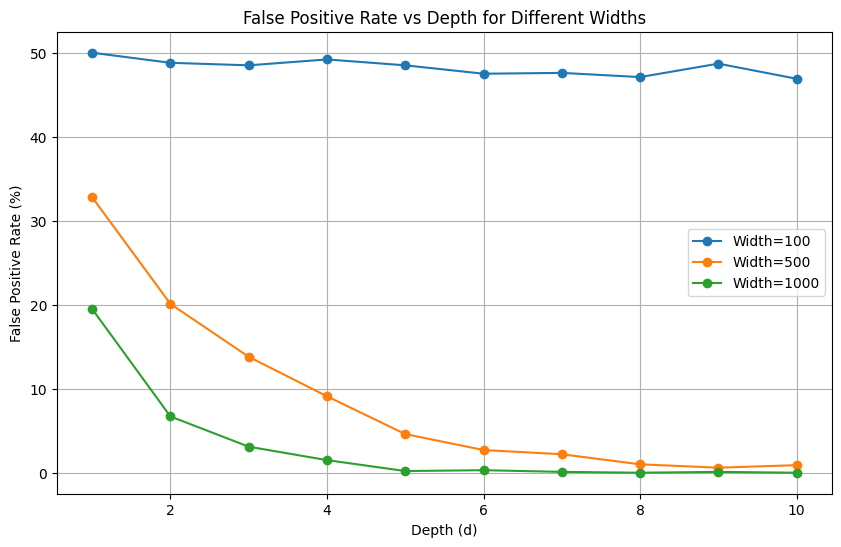

In [ ]:
def evaluate_false_positives(cms, test_items, true_counts):
    false_positives = 0
    total_queries = 0
    
    for item in test_items:
        estimated = cms.estimate(item)
        true_count = true_counts.get(item, 0)
        
        if true_count == 0 and estimated > 0:
            false_positives += 1
        total_queries += 1
    
    return false_positives / total_queries * 100  # процент ложноположительных

# Генерация тестовых данных
def generate_test_data(num_items=10000, num_unique=1000):
    # Генерируем некоторые уникальные элементы
    unique_items = [f"item_{i}" for i in range(num_unique)]
    
    # Создаем истинные счетчики (некоторые элементы будут с нулевым счетчиком)
    true_counts = {item: np.random.randint(1, 100) for item in unique_items[:num_unique//2]}
    
    # Добавляем элементы с нулевым счетчиком
    for item in unique_items[num_unique//2:]:
        true_counts[item] = 0
    
    # Создаем поток данных для обновления CMS
    stream = []
    for item, count in true_counts.items():
        if count > 0:
            stream.extend([item] * count)
    
    np.random.shuffle(stream)
    
    return stream, unique_items, true_counts

# Эксперимент 1: Зависимость от ширины (w)
def experiment_width():
    depths = [2, 3, 5, 7]
    widths = [10, 50, 100, 200, 500, 1000, 2000]
    
    stream, test_items, true_counts = generate_test_data()
    
    results = {d: [] for d in depths}
    
    for d in depths:
        for w in widths:
            cms = CountMinSketch(w, d)
            
            # Обновляем CMS
            for item in stream:
                cms.update(item)
            
            # Оцениваем ложноположительные
            fp_rate = evaluate_false_positives(cms, test_items, true_counts)
            results[d].append(fp_rate)
            print(f"Test d = {d}, w = {w}")
            print(f"False - positive rate: {round(fp_rate,2)}")

    
    # Построение графиков
    plt.figure(figsize=(10, 6))
    for d in depths:
        plt.plot(widths, results[d], label=f'Depth={d}', marker='o')
    
    plt.xlabel('Width (w)')
    plt.ylabel('False Positive Rate (%)')
    plt.title('False Positive Rate vs Width for Different Depths')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# Эксперимент 2: Зависимость от глубины (d)
def experiment_depth():
    widths = [100, 500, 1000]
    depths = range(1, 11)
    
    stream, test_items, true_counts = generate_test_data()
    
    results = {w: [] for w in widths}
    
    for w in widths:
        for d in depths:
            cms = CountMinSketch(w, d)
            
            # Обновляем CMS
            for item in stream:
                cms.update(item)
            
            # Оцениваем ложноположительные
            fp_rate = evaluate_false_positives(cms, test_items, true_counts)
            results[w].append(fp_rate)
            print(f"Test d = {d}, w = {w}")
            print(f"False - positive rate: {round(fp_rate,2)}")
    
    # Построение графиков
    plt.figure(figsize=(10, 6))
    for w in widths:
        plt.plot(depths, results[w], label=f'Width={w}', marker='o')
    
    plt.xlabel('Depth (d)')
    plt.ylabel('False Positive Rate (%)')
    plt.title('False Positive Rate vs Depth for Different Widths')
    plt.legend()
    plt.grid(True)
    plt.show()

# Запуск экспериментов
experiment_width()
experiment_depth()